In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data: (50000, 32, 32, 3)
Testing data: (10000, 32, 32, 3)


In [3]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64,
    verbose=1
)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3681 - loss: 2.2731 - val_accuracy: 0.5158 - val_loss: 1.6148
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5722 - loss: 1.4414 - val_accuracy: 0.5448 - val_loss: 1.4526
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6540 - loss: 1.2004 - val_accuracy: 0.6412 - val_loss: 1.3282
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7052 - loss: 1.0729 - val_accuracy: 0.5886 - val_loss: 1.5668
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7426 - loss: 0.9969 - val_accuracy: 0.6918 - val_loss: 1.1426
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7717 - loss: 0.9399 - val_accuracy: 0.7238 - val_loss: 1.0982
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7935 - loss: 0.8821 - val_accuracy: 0.7166 - val_loss: 1.1198
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8140 - loss: 0.8398 - val_accuracy:

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 2s - 7ms/step - accuracy: 0.7235 - loss: 1.3285
Test accuracy: 0.7235000133514404


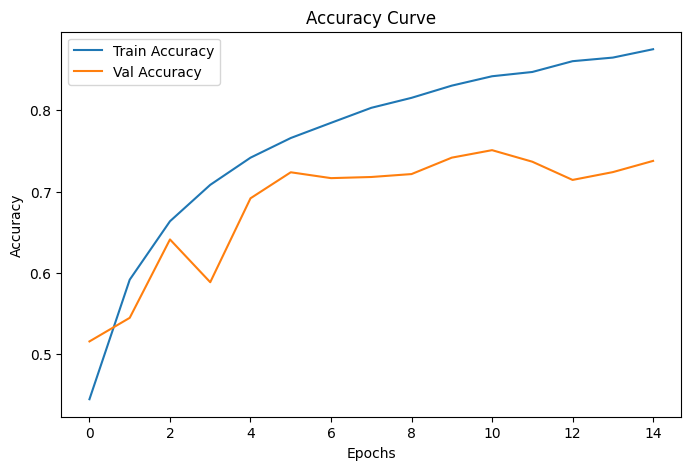

In [10]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

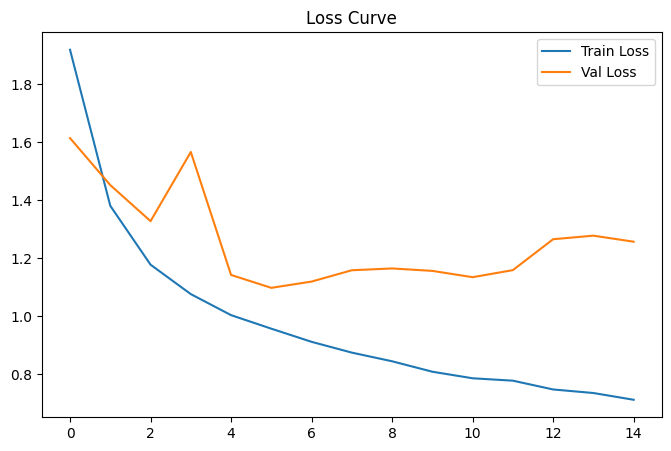

In [11]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


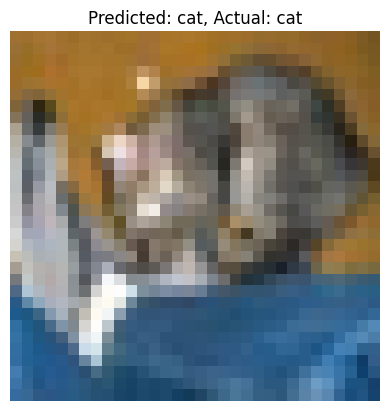

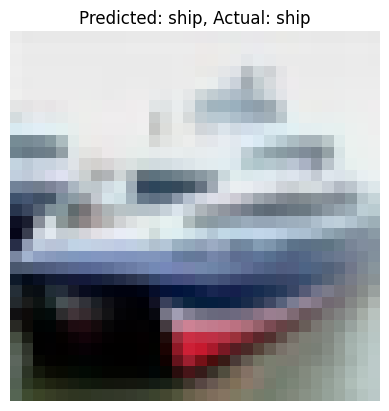

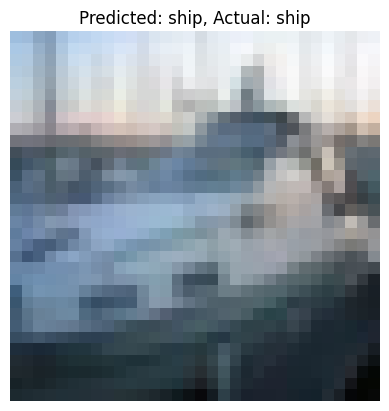

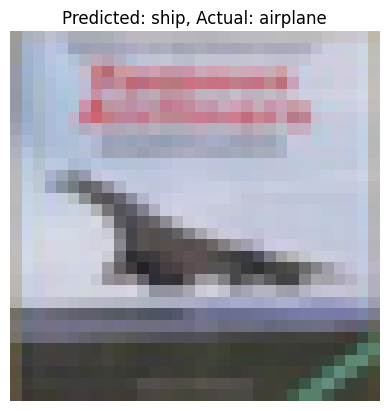

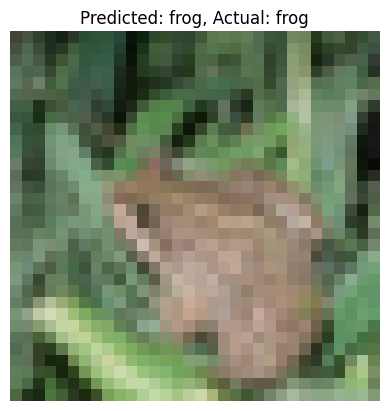

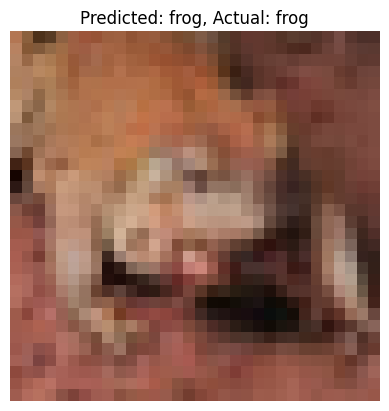

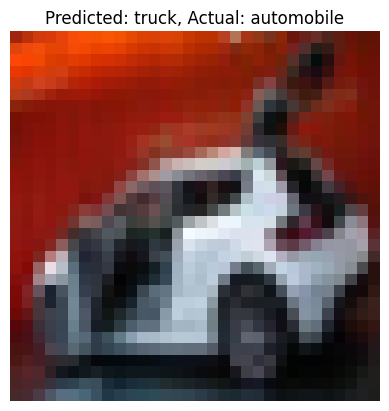

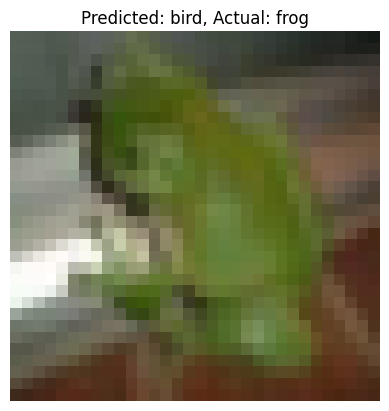

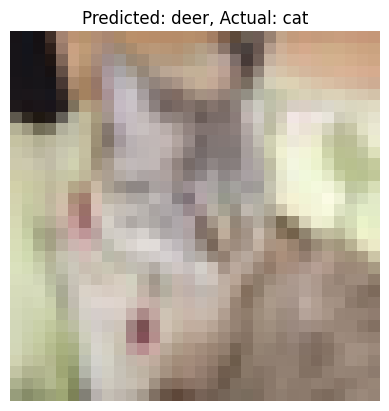

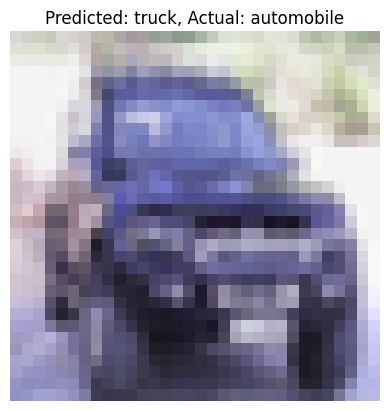

In [12]:
predictions = model.predict(X_test[:10])

for i in range(10):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, Actual: {class_names[y_test[i][0]]}")
    plt.axis('off')
    plt.show()
